<a href="https://colab.research.google.com/github/Omshastrakar/Om/blob/master/Servo_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
df = pd.read_csv('https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [4]:
df.head()

,Motor,Screw,Pgain,Vgain,Class
0,E,E,5,4,4
1,B,D,6,5,11
2,D,D,4,3,6
3,B,A,3,2,48
4,D,B,6,5,6


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [6]:
df.describe()

,Pgain,Vgain,Class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,21.173653
std,1.017770,1.369850,13.908038
min,3.000000,1.000000,1.000000
25%,3.000000,1.000000,10.500000
50%,4.000000,2.000000,18.000000
75%,5.000000,4.000000,33.500000
max,6.000000,5.000000,51.000000


In [7]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [8]:
df.shape

(167, 5)

In [9]:
df[['Motor']].value_counts()

,count
Motor,
C,40
A,36
B,36
E,33
D,22


In [10]:
df[['Screw']].value_counts()

,count
Screw,
A,42
B,35
C,31
D,30
E,29


In [11]:
df.replace({'Motor': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace=True)

In [12]:
df.replace({'Screw': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4}}, inplace=True)

In [13]:
y = df['Class']

In [14]:
y.shape

(167,)

In [15]:
y

,Class
0,4
1,11
2,6
3,48
4,6
...,...
162,44
163,40
164,25
165,44


In [17]:
x = df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [18]:
x = df.drop(['Class'], axis=1)

In [19]:
x.shape

(167, 4)

In [20]:
x

,Motor,Screw,Pgain,Vgain
0,4,4,5,4
1,1,3,6,5
2,3,3,4,3
3,1,0,3,2
4,3,1,6,5
...,...,...,...,...
162,1,2,3,2
163,1,4,3,1
164,2,3,4,3
165,0,1,3,2


In [21]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2529)

In [25]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((116, 4), (51, 4), (116,), (51,))

In [26]:
from sklearn.linear_model import LogisticRegression

In [28]:
Ir = LogisticRegression()

In [29]:
Ir.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [30]:
y_pred = Ir.predict(x_test)

In [31]:
y_pred.shape

(51,)

In [32]:
y_pred

array([23, 35, 12, 47, 43,  8,  9,  6, 43, 45, 11, 22,  8,  3,  8,  3,  9,
       41, 41, 12, 43, 35, 35, 35, 22, 12,  8,  6, 13, 12, 20, 11, 41, 41,
        3,  9, 22, 43,  3, 43, 23,  6,  3,  3, 23, 23, 41,  9, 11, 11, 11])

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
mean_squared_error(y_test, y_pred)

64.07843137254902

In [36]:
mean_absolute_error(y_test, y_pred)

5.333333333333333

In [37]:
r2_score(y_test, y_pred)

0.6901885992795083

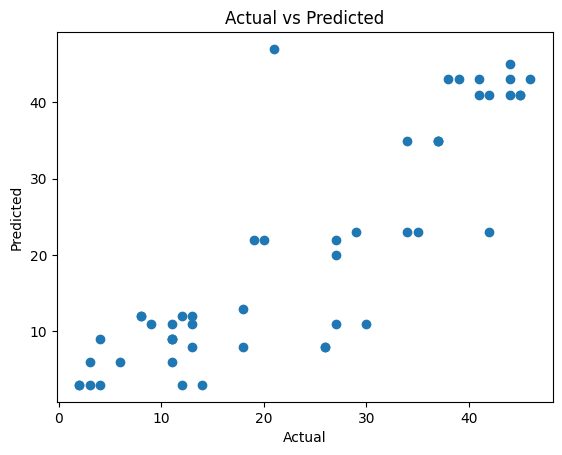

In [39]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [44]:
x_new = df.sample()

In [45]:
x_new

,Motor,Screw,Pgain,Vgain,Class
123,2,4,3,1,34


In [46]:
x_new.shape

(1, 5)

In [47]:
x_new = x_new.drop(['Class'], axis=1)

In [48]:
x_new

,Motor,Screw,Pgain,Vgain
123,2,4,3,1


In [49]:
x_new.shape

(1, 4)

In [51]:
y_pred_new = Ir.predict(x_new)

In [52]:
y_pred_new

array([23])